In [11]:
import numpy as np

In [12]:
import random

In [13]:
import matplotlib.pyplot as plt

In [14]:
from tensorflow.keras.models import Sequential

In [15]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [16]:
X_train = np.loadtxt('input.csv', delimiter = ',')

In [17]:
Y_train = np.loadtxt('labels.csv', delimiter = ',')

In [18]:
X_test = np.loadtxt('input_test.csv', delimiter = ',')

In [19]:
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [20]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)

In [21]:
Y_train = Y_train.reshape(len(Y_train), 1)

In [22]:
X_test = X_test.reshape(len(X_test), 100, 100, 3)

In [23]:
Y_test = Y_test.reshape(len(Y_test), 1)

In [24]:
X_train = X_train/255.0

In [25]:
X_test = X_test/255.0

In [26]:
print("Shape of X_train: ", X_train.shape)

Shape of X_train:  (2000, 100, 100, 3)


In [27]:
print("Shape of Y_train: ", Y_train.shape)

Shape of Y_train:  (2000, 1)


In [28]:
print("Shape of X_test: ", X_test.shape)

Shape of X_test:  (400, 100, 100, 3)


In [29]:
print("Shape of Y_test: ", Y_test.shape)

Shape of Y_test:  (400, 1)


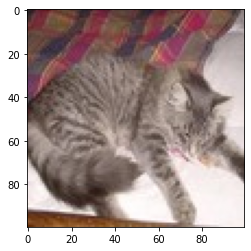

In [31]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [32]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])


In [36]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)
model.evaluate(X_test, Y_test)

Epoch 1/5
32/32 [==============================] - 11s 313ms/step - loss: 0.5936 - accuracy: 0.6985
Epoch 2/5
32/32 [==============================] - 10s 302ms/step - loss: 0.5633 - accuracy: 0.7135
Epoch 3/5
32/32 [==============================] - 10s 317ms/step - loss: 0.5147 - accuracy: 0.7645
Epoch 4/5
32/32 [==============================] - 10s 309ms/step - loss: 0.4950 - accuracy: 0.7615
Epoch 5/5
13/13 [==============================] - 1s 46ms/step - loss: 0.5748 - accuracy: 0.6825


[0.5748385787010193, 0.6825000047683716]

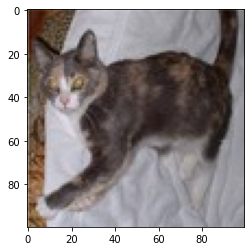

In [40]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

In [41]:
y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

In [43]:
if(y_pred == 0):
    pred = 'cat'
else:
    pred = 'dog'
    
print("Our model says it is a :", pred)

Our model says it is a : cat
